<h3>-- Functions needed --</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

sns.set_palette("Set3")

In [2]:
#Function to show all numerical analysis
def univariate_numerical_analysis(
    numerical_frame: pd.DataFrame,
    column: str,
    new_index: str
) -> pd.DataFrame:

    s = numerical_frame[column]

    stats = {
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode().round(2).tolist(),
        "Standard Deviation": s.std(),
        "Range": s.max() - s.min(),
        "Inter-Quartile Range": s.quantile(0.75) - s.quantile(0.25),
        "Skewness": s.skew(),
        "Kurtosis": s.kurtosis(),
        "Coefficient of Variance": (s.std() / s.mean()) if s.mean() != 0 else 0,
    }

    output_frame = (
        pd.DataFrame(stats, index=[new_index])
        .round(2)
    )

    return output_frame

In [ ]:
#Function to calculate IQR and outliers
def iqr_outliers(numerical_frame: pd.DataFrame,column:str):
    
    q1 = numerical_frame[column].quantile(0.25)
    q3 = numerical_frame[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    filtered_numerical_frame = numerical_frame[numerical_frame[column].between(lower, upper)]

    return(filtered_numerical_frame)

In [3]:
#Function to check null values and duplicates
def null_duplicate_check(df, df_name):
    RED = "\033[91m"
    RESET = "\033[0m"

    # Nulls
    non_null = df.notna().sum()
    nulls = df.isna().sum()
    na_percentage = (df.isna().mean() * 100).round(2)

    # Duplicates
    dup_total = df.duplicated()
    dup_rows = df[dup_total].index.astype(str)

    print(f"""
🔍 Checking {df_name}

Number of non-null values:
{non_null}

Number of null values:
{RED}{nulls}{RESET}

Percentage of null values:
{na_percentage}
""")

    if dup_total.any():
        print(f"⚠ Duplicate rows: {', '.join(dup_rows)}")
    else:
        print("✔ No duplicate rows found")

    cols_with_na = nulls[nulls > 0].index
    if len(cols_with_na) > 0:
        print(f"⚠ Columns with null values: {', '.join(cols_with_na)}")
    else:
        print("✔ No null values in columns")

    print("-" * 50)

In [4]:
#Function to check whitespaces
def check_whitespace_all_strings(df):
    RED = "\033[91m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RESET = "\033[0m"

    str_cols = df_cat.select_dtypes(include=["object", "string"]).columns

    if len(str_cols) == 0:
        print(f"{GREEN}✔ No string columns found{RESET}")
        return

    print(f"\n🔍 Checking whitespace in {len(str_cols)} string columns\n")

    issues_found = False

    for col in str_cols:
        series = df_cat[col]

        leading_trailing = series.str.contains(r"^\s+|\s+$", na=False).sum()
        only_spaces = series.str.fullmatch(r"\s+", na=False).sum()

        if leading_trailing > 0 or only_spaces > 0:
            issues_found = True
            print(f"{RED}⚠ Column: {col}{RESET}")
            print(f"{YELLOW}  - Leading/trailing spaces: {leading_trailing}{RESET}")
            print(f"{YELLOW}  - Values with only spaces: {only_spaces}{RESET}")
            print()

    if not issues_found:
        print(f"{GREEN}✔ All string columns are clean (no leading/trailing spaces){RESET}")

<h3>-- Inspection of the dataset --</h3>

In [5]:
df = pd.read_csv("Top_Anime_data.csv")

In [6]:
#Get info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

In [7]:
df.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


In [8]:
#Convert names to snake_Case to avoid empty spaces of upper case letters:
df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]
df.columns

Index(['score', 'popularity', 'rank', 'members', 'description', 'synonyms',
       'japanese', 'english', 'type', 'episodes', 'status', 'aired',
       'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source',
       'genres', 'demographic', 'duration', 'rating'],
      dtype='object')

In [9]:
# Determine which columns are numerical and which are categorical
df_num = df.select_dtypes(include="number")
num_columns = list(df_num.columns)
print(f"The numerical columns are :{num_columns}")

df_cat = df.select_dtypes(exclude="number")
cat_columns = list(df_cat.columns)
print(f"The categorical columns are :{cat_columns}")

The numerical columns are :['score', 'popularity', 'rank', 'members']
The categorical columns are :['description', 'synonyms', 'japanese', 'english', 'type', 'episodes', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source', 'genres', 'demographic', 'duration', 'rating']


In [10]:
#Checking numerical data
null_duplicate_check(df_num, "Numerical Data")


🔍 Checking Numerical Data

Number of non-null values:
score         1000
popularity    1000
rank          1000
members       1000
dtype: int64

Number of null values:
score         0
popularity    0
rank          0
members       0
dtype: int64

Percentage of null values:
score         0.0
popularity    0.0
rank          0.0
members       0.0
dtype: float64

✔ No duplicate rows found
✔ No null values in columns
--------------------------------------------------


In [11]:
#Checking categorical data
null_duplicate_check(df_cat, "Categorical Data")


🔍 Checking Categorical Data

Number of non-null values:
description    1000
synonyms        709
japanese        999
english         859
type           1000
episodes       1000
status         1000
aired          1000
premiered       569
broadcast       569
producers      1000
licensors      1000
studios        1000
source         1000
genres          771
demographic     521
duration       1000
rating         1000
dtype: int64

Number of null values:
description      0
synonyms       291
japanese         1
english        141
type             0
episodes         0
status           0
aired            0
premiered      431
broadcast      431
producers        0
licensors        0
studios          0
source           0
genres         229
demographic    479
duration         0
rating           0
dtype: int64

Percentage of null values:
description     0.0
synonyms       29.1
japanese        0.1
english        14.1
type            0.0
episodes        0.0
status          0.0
aired           0.0
pre

The only column with null values that will have impact is "genres", so we will work on it later

In [12]:
#Working with categorical data
#Delete spaces from begginig or end
cat_cols_str=df_cat.columns
df_cat[cat_cols_str]= df_cat[cat_cols_str].apply(lambda col: col.str.strip())

In [13]:
check_whitespace_all_strings(df_cat)


🔍 Checking whitespace in 18 string columns

✔ All string columns are clean (no leading/trailing spaces)


<h3>-- Data Formatting --</h3>

We want to refine the data on some columns to get more insights or fixing data problems
Columns affected: episodes, aired, studios and genres

<h4>Episodes</h4>
Some animes have Unknown numbers of episodes, so we want to make them numbers to work with

In [14]:
#Making episodes column numeric
#All null values set to zero, the zeros can be dropped later if needed.
df["episodes"] = pd.to_numeric(df["episodes"], errors = "coerce").fillna(0).astype(int)

In [15]:
# We check what animes are affected
df.loc[df["episodes"] == 0, ["english"]]


,english
50,One Piece
389,Holo Graffiti
419,Case Closed


<h4>Aired</h4>
It has format: begginig to end. We will split them to work with both data
The ? values will be replaced with the date of the extraction of the database (Dec 31, 2024)

*We also have to look for movies wich only have one date*

In [16]:
# Split aired in two
dates = df["aired"].str.split(" to ", n=1, expand=True)
df["start_date"] = pd.to_datetime(dates[0], errors="coerce")
df["end_date"] = pd.to_datetime(dates[1], errors="coerce")

# Deal with movies. Start date = End date
movies = dates[1].isna()
df.loc[movies,"end_date"] = df.loc[movies,"start_date"]

# Deal with "to ?" results
cut_date = "Dec 31, 2024"
ongoing = dates[1].eq("?")
df.loc[ongoing, "end_date"] = cut_date

df["total_aired"] = (df["end_date"] - df["start_date"]).dt.days / 365

In [17]:
# df[["english","start_date","end_date"]].head(51)
# This confirms that 'One Piece' has now the end date that we want

<h4>Studios</h4>
We will convert the strings in lists

In [18]:
df["studios"]

0                   Madhouse
1                      Bones
2                  White Fox
3      Bandai Namco Pictures
4                 Wit Studio
               ...          
995          Satelight, 8bit
996                 Lay-duce
997        TMS Entertainment
998        TMS Entertainment
999     SANZIGEN, LIDENFILMS
Name: studios, Length: 1000, dtype: object

*We found "None found" and "add some" as data for the studios. Which we will have to remove*

In [19]:
remove = {"None found", "add some"}

df["studios"] = (
    df["studios"]
    .str.split(",")
    .apply(lambda lst: [
        s.strip()
        for s in lst
        if s.strip().lower() not in remove
    ])
)


In [20]:
### example way can be used to find indexes that contain a studio

# mask = df["studios"].apply(lambda _: "Madhouse" in _)        
# df_madhouse = df[mask]

# madhouse_production_count =  df_madhouse.shape[0]
# madhouse_production_count

In [21]:
df["studios"]

0                   [Madhouse]
1                      [Bones]
2                  [White Fox]
3      [Bandai Namco Pictures]
4                 [Wit Studio]
                ...           
995          [Satelight, 8bit]
996                 [Lay-duce]
997        [TMS Entertainment]
998        [TMS Entertainment]
999     [SANZIGEN, LIDENFILMS]
Name: studios, Length: 1000, dtype: object

We have to store only the names of the studios once.

In [22]:
list_unique_studios = set().union(*df["studios"])
list_unique_studios
# We use an empty set and union (to check all previuos lists) with df[*studios] (* unpacks studios, so each list is acted on not the series),

{'8bit',
 'A-1 Pictures',
 'A.C.G.T.',
 'ABJ COMPANY',
 'AHA Entertainment',
 'AIC',
 'AIC ASTA',
 'APPP',
 'Actas',
 'Ajia-do',
 'Animation Do',
 'Artland',
 'B.CMAY PICTURES',
 'BUG FILMS',
 'Bandai Namco Pictures',
 'Bee Train',
 'Bibury Animation Studios',
 'Bones',
 "Brain's Base",
 'C-Station',
 'C2C',
 'CLAP',
 'Cloud Hearts',
 'CloverWorks',
 'CoMix Wave Films',
 'Colored Pencil Animation',
 'CygamesPictures',
 'DandeLion Animation Studio',
 'David Production',
 'Doga Kobo',
 'Drive',
 'E&G Films',
 'Egg Firm',
 'Encourage Films',
 'Fenz',
 'Flat Studio',
 'Gainax',
 'Gallop',
 'Geek Toys',
 'Geno Studio',
 'GoHands',
 'Gonzo',
 'Graphinica',
 'Group TAC',
 'HAL Film Maker',
 'HMCH',
 'HORNETS',
 'Haoliners Animation League',
 'Hololive Production',
 'Hoods Entertainment',
 'Imagin',
 'J.C.Staff',
 'K-Factory',
 'Khara',
 'Kinema Citrus',
 'Kitty Film Mitaka Studio',
 'Kyoto Animation',
 'LAN Studio',
 'LIDENFILMS',
 'Lapin Track',
 'Lay-duce',
 'Lerche',
 'M.S.C',
 'MAPPA',
 '

<h4>Genres</h4>
We have words duplicated so we will have to split them into a list: genres_list.

In [23]:
def remove_duplicated_string(s):                # Function to remove duplicated words after checking if its really duplicated.
    if pd.isna(s):
        return pd.NA   
                 
    mid = len(s) // 2
    if s[:mid] == s[mid:]:
        return s[:mid]
    return s

def clean_genres_cell(cell):                    # check if cell is NaN
    if pd.isna(cell):
        return pd.NA                            # returns a "clean" NA

    
    genres = str(cell).split(",")               # Converts to a string and separates by comma

    cleaned = []

    for g in genres:                            # Clean each individual value
        g = g.strip()                           # remove whitespaces
        g = remove_duplicated_string(g)         # uses previous function to remove duplicates
        cleaned.append(g)

    return ", ".join(cleaned)                   # Joins in the new string

Now we have to assing each  cleaned genre to a new column to be able to make analysis later

In [24]:
df["genres"] = df["genres"].apply(clean_genres_cell)
df["genres"]

0              Adventure, Drama, Fantasy
1      Action, Adventure, Drama, Fantasy
2                Drama, Sci-Fi, Suspense
3                 Action, Comedy, Sci-Fi
4                Action, Drama, Suspense
                     ...                
995              Action, Romance, Sci-Fi
996           Action, Adventure, Fantasy
997           Adventure, Comedy, Mystery
998           Adventure, Comedy, Mystery
999                                 <NA>
Name: genres, Length: 1000, dtype: object

In [25]:
df["genres_list"] = df["genres"].str.split(", ")        # From string to list

genres_pivot = (                                      
    df["genres_list"]
    .explode()                                          # Convert list to rows
    .str.get_dummies()                                  # Convert unique values in columns
    .groupby(level=0).sum()                             # Groups again for original row and adds
)

df = df.join(genres_pivot)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   score          1000 non-null   float64       
 1   popularity     1000 non-null   int64         
 2   rank           1000 non-null   int64         
 3   members        1000 non-null   int64         
 4   description    1000 non-null   object        
 5   synonyms       709 non-null    object        
 6   japanese       999 non-null    object        
 7   english        859 non-null    object        
 8   type           1000 non-null   object        
 9   episodes       1000 non-null   int64         
 10  status         1000 non-null   object        
 11  aired          1000 non-null   object        
 12  premiered      569 non-null    object        
 13  broadcast      569 non-null    object        
 14  producers      1000 non-null   object        
 15  licensors      1000 no

<h4>English vs Japanese Names</h4>
Some English names have null values, so we will replace them with the japanese names

In [27]:
df["name"] = df["english"].fillna(df["japanese"])

<h4>Duration</h4>
Data has stored the duration of TV animes as "X min. per ep." while movies as "X hr. Y min." so we will calculate the total duration

In [28]:
def to_minutes(d):
    if pd.isna(d):
        return pd.NA

    d = d.lower().replace(".", "")

    total = 0

    if "hr" in d:
        h = int(d.split("hr")[0].strip())
        total += 60 * h
        d = d.split("hr", 1)[1]

    if "min" in d:
        m = int(d.split("min")[0].strip())
        total += m

    return total


df["duration_min"] = df["duration"].apply(to_minutes)


Now we calculate the total runtime of each anime (duration in minutes * number of episodes)

In [29]:
df["total_runtime"] = df["duration_min"] * df["episodes"]
df[["duration_min","episodes","total_runtime"]]

,duration_min,episodes,total_runtime
0,24,28,672
1,24,64,1536
2,24,24,576
3,24,51,1224
4,23,10,230
...,...,...,...
995,119,1,119
996,24,5,120
997,110,1,110
998,116,1,116


<h4>End of Modifications</h4>
Once the modifications on the desired columns has ended. We will do a new inspection of the dataset

In [30]:
#Convert names to snake_case to avoid empty spaces of upper case letters: New columns were added
df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]
df.columns

Index(['score', 'popularity', 'rank', 'members', 'description', 'synonyms',
       'japanese', 'english', 'type', 'episodes', 'status', 'aired',
       'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source',
       'genres', 'demographic', 'duration', 'rating', 'start_date', 'end_date',
       'total_aired', 'genres_list', 'action', 'adventure', 'avant_garde',
       'award_winning', 'boys_love', 'comedy', 'drama', 'ecchi', 'fantasy',
       'girls_love', 'gourmet', 'horror', 'mystery', 'romance', 'sci-fi',
       'slice_of_life', 'sports', 'supernatural', 'suspense', 'name',
       'duration_min', 'total_runtime'],
      dtype='object')

In [31]:
df_num = df.select_dtypes(include="number")
num_columns = list(df_num.columns)
print(f"The numerical columns are :{num_columns}")

df_cat = df.select_dtypes(exclude="number")
cat_columns = list(df_cat.columns)
print(f"The categorical columns are :{cat_columns}")

The numerical columns are :['score', 'popularity', 'rank', 'members', 'episodes', 'total_aired', 'action', 'adventure', 'avant_garde', 'award_winning', 'boys_love', 'comedy', 'drama', 'ecchi', 'fantasy', 'girls_love', 'gourmet', 'horror', 'mystery', 'romance', 'sci-fi', 'slice_of_life', 'sports', 'supernatural', 'suspense', 'duration_min', 'total_runtime']
The categorical columns are :['description', 'synonyms', 'japanese', 'english', 'type', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source', 'genres', 'demographic', 'duration', 'rating', 'start_date', 'end_date', 'genres_list', 'name']


In [32]:
null_duplicate_check(df_num, "Numerical Data")


🔍 Checking Numerical Data

Number of non-null values:
score            1000
popularity       1000
rank             1000
members          1000
episodes         1000
total_aired      1000
action           1000
adventure        1000
avant_garde      1000
award_winning    1000
boys_love        1000
comedy           1000
drama            1000
ecchi            1000
fantasy          1000
girls_love       1000
gourmet          1000
horror           1000
mystery          1000
romance          1000
sci-fi           1000
slice_of_life    1000
sports           1000
supernatural     1000
suspense         1000
duration_min     1000
total_runtime    1000
dtype: int64

Number of null values:
score            0
popularity       0
rank             0
members          0
episodes         0
total_aired      0
action           0
adventure        0
avant_garde      0
award_winning    0
boys_love        0
comedy           0
drama            0
ecchi            0
fantasy          0
girls_love       0
gourmet   

In [33]:
# Check which columns contain lists, so the test could fail
cols_with_lists = df.columns[df.map(lambda x: isinstance(x, list)).any()]
cols_with_lists

Index(['studios', 'genres_list'], dtype='object')

In [34]:
df_cat_no_lists = df_cat.drop(columns=["studios", "genres_list"])    
null_duplicate_check(df_cat_no_lists, "Categorical Data")


🔍 Checking Categorical Data

Number of non-null values:
description    1000
synonyms        709
japanese        999
english         859
type           1000
status         1000
aired          1000
premiered       569
broadcast       569
producers      1000
licensors      1000
source         1000
genres          771
demographic     521
duration       1000
rating         1000
start_date     1000
end_date       1000
name            999
dtype: int64

Number of null values:
description      0
synonyms       291
japanese         1
english        141
type             0
status           0
aired            0
premiered      431
broadcast      431
producers        0
licensors        0
source           0
genres         229
demographic    479
duration         0
rating           0
start_date       0
end_date         0
name             1
dtype: int64

Percentage of null values:
description     0.0
synonyms       29.1
japanese        0.1
english        14.1
type            0.0
status          0.0
aire

In [35]:
check_whitespace_all_strings(df_cat)


🔍 Checking whitespace in 19 string columns

⚠ Column: description
  - Leading/trailing spaces: 128
  - Values with only spaces: 0



<h3>-- Prepare new dataset --</h3>
Dropping columns that are not going to be used and reordering the most important ones

In [36]:
num_drop = ['popularity', 'members']
cat_drop = ['description', 'synonyms', 'japanese', 'status', 'aired', 'premiered', 'broadcast', 'producers', 'licensors', 'demographic', 'english', 'duration']
df_drop = num_drop + cat_drop

anime = df.drop(columns = df_drop)

In [37]:
anime.head()

,score,rank,type,episodes,studios,source,genres,rating,start_date,end_date,...,mystery,romance,sci-fi,slice_of_life,sports,supernatural,suspense,name,duration_min,total_runtime
0,9.38,1,TV,28,[Madhouse],Manga,"Adventure, Drama, Fantasy",PG-13 - Teens 13 or older,2023-09-29,2024-03-22,...,0,0,0,0,0,0,0,Frieren: Beyond Journey's End,24,672
1,9.09,2,TV,64,[Bones],Manga,"Action, Adventure, Drama, Fantasy",R - 17+ (violence & profanity),2009-04-05,2010-07-04,...,0,0,0,0,0,0,0,Fullmetal Alchemist: Brotherhood,24,1536
2,9.07,3,TV,24,[White Fox],Visual novel,"Drama, Sci-Fi, Suspense",PG-13 - Teens 13 or older,2011-04-06,2011-09-14,...,0,0,1,0,0,0,1,Steins;Gate,24,576
3,9.06,4,TV,51,[Bandai Namco Pictures],Manga,"Action, Comedy, Sci-Fi",PG-13 - Teens 13 or older,2015-04-08,2016-03-30,...,0,0,1,0,0,0,0,Gintama Season 4,24,1224
4,9.05,5,TV,10,[Wit Studio],Manga,"Action, Drama, Suspense",R - 17+ (violence & profanity),2019-04-29,2019-07-01,...,0,0,0,0,0,0,1,Attack on Titan Season 3 Part 2,23,230


In [38]:
anime.columns

Index(['score', 'rank', 'type', 'episodes', 'studios', 'source', 'genres',
       'rating', 'start_date', 'end_date', 'total_aired', 'genres_list',
       'action', 'adventure', 'avant_garde', 'award_winning', 'boys_love',
       'comedy', 'drama', 'ecchi', 'fantasy', 'girls_love', 'gourmet',
       'horror', 'mystery', 'romance', 'sci-fi', 'slice_of_life', 'sports',
       'supernatural', 'suspense', 'name', 'duration_min', 'total_runtime'],
      dtype='object')

In [39]:
cols = ["rank", "score", "name", "episodes", "duration_min", "total_runtime"]
anime = anime[cols + [c for c in anime.columns if c not in cols]]


In [40]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   rank           1000 non-null   int64         
 1   score          1000 non-null   float64       
 2   name           999 non-null    object        
 3   episodes       1000 non-null   int64         
 4   duration_min   1000 non-null   int64         
 5   total_runtime  1000 non-null   int64         
 6   type           1000 non-null   object        
 7   studios        1000 non-null   object        
 8   source         1000 non-null   object        
 9   genres         771 non-null    object        
 10  rating         1000 non-null   object        
 11  start_date     1000 non-null   datetime64[ns]
 12  end_date       1000 non-null   datetime64[ns]
 13  total_aired    1000 non-null   float64       
 14  genres_list    771 non-null    object        
 15  action         1000 no

In [41]:
anime.to_csv('anime_clean.csv', index=False)   # Save to .csv in case we need to check it from outside pandas

<h1 style="color: #c713eb;">-- Exploration --</h1>


<h2> 1. How has runtime of anime varied during the years? </h2>

<h5> Check how long episodes are</h5>

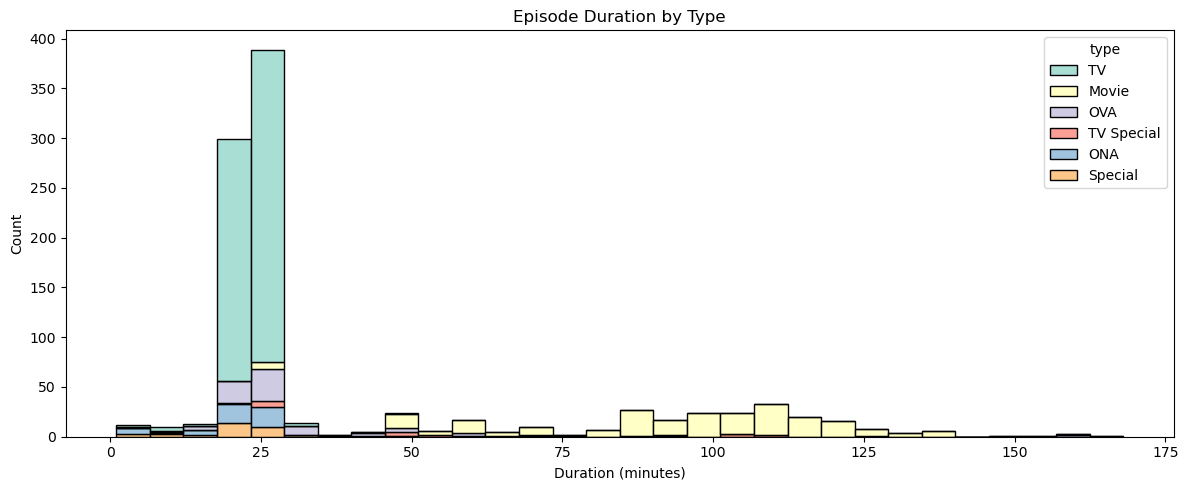

In [97]:
plt.figure(figsize=(12,5))
sns.histplot(
    data=anime,
    x="duration_min",
    hue="type",
    bins=30,
    multiple="stack"
)

plt.title("Episode Duration by Type")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()

We can see that the most predominant types are TV and Movies, so we will analyse separately for them and ingnore the rest

<h4>-- TV --</h4>

In [106]:
anime_tv = anime[anime["type"] == "TV"]

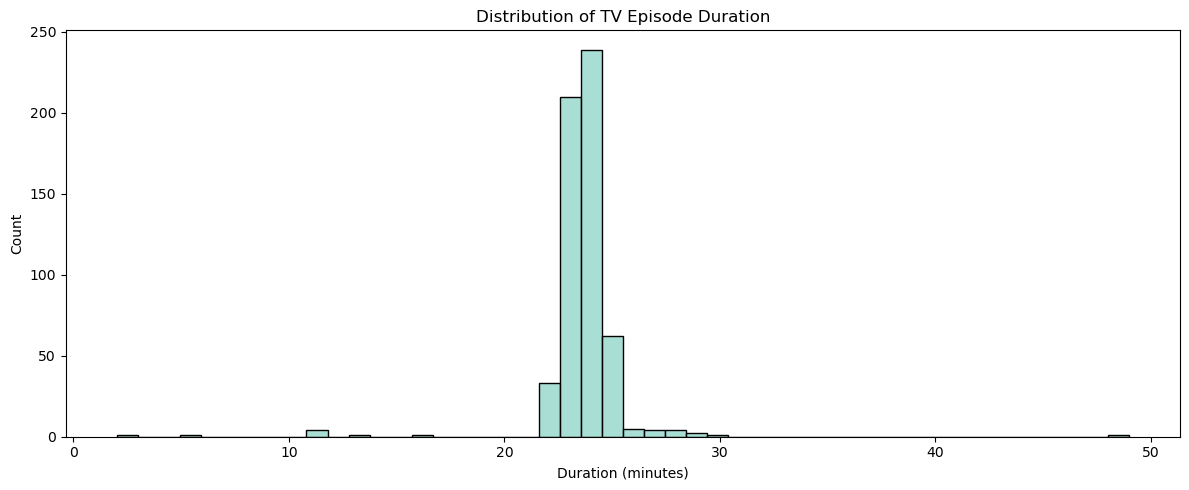

In [111]:
plt.figure(figsize=(12,5))
sns.histplot(anime_tv["duration_min"], bins="auto")
plt.title("Distribution of TV Episode Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

This histogram allow us to check that the majority of episodes are between 20 and 35 min, so we can narrow the visualization by removing the outliers

In [108]:
filtered_anime_duration_tv = iqr_outliers(anime_tv, "duration_min")

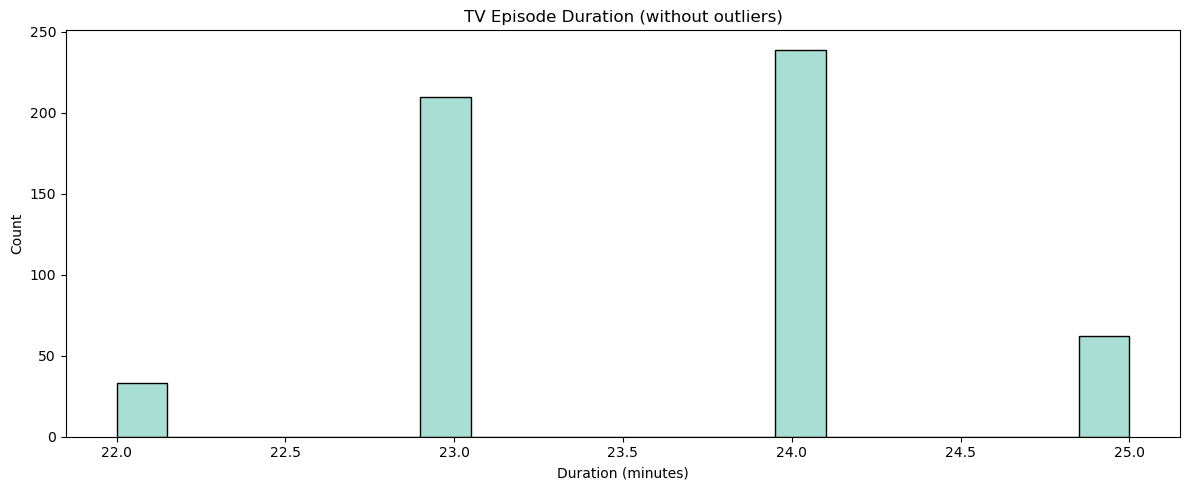

In [105]:
plt.figure(figsize=(12,5))
sns.histplot(
    data=filtered_anime_duration_tv,
    x="duration_min",
    bins=20,
)

plt.title("TV Episode Duration (without outliers)")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()


With this we can determine exactly that the majority of episodes (excluding outliers) have a duration of 23 or 24 min

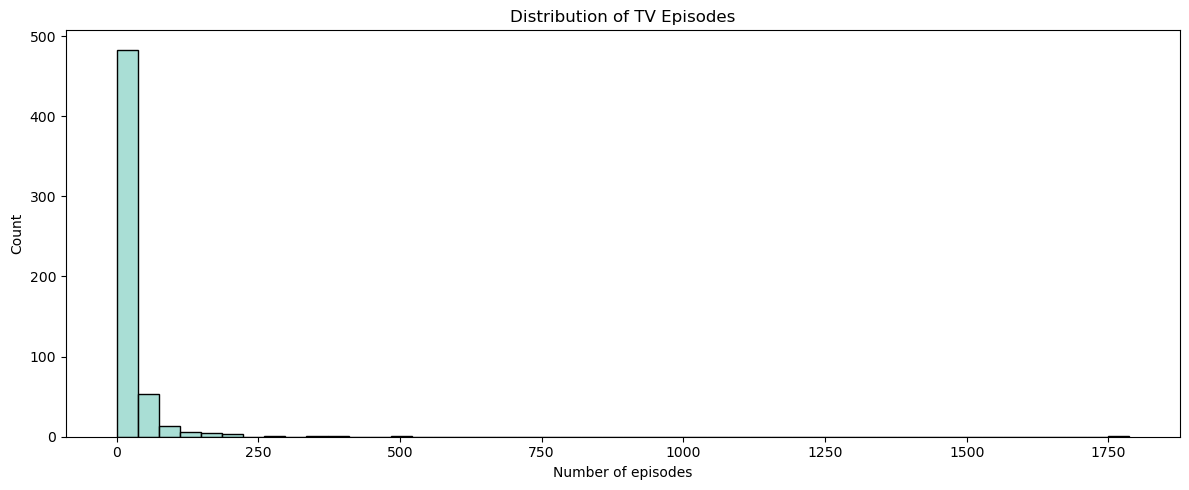

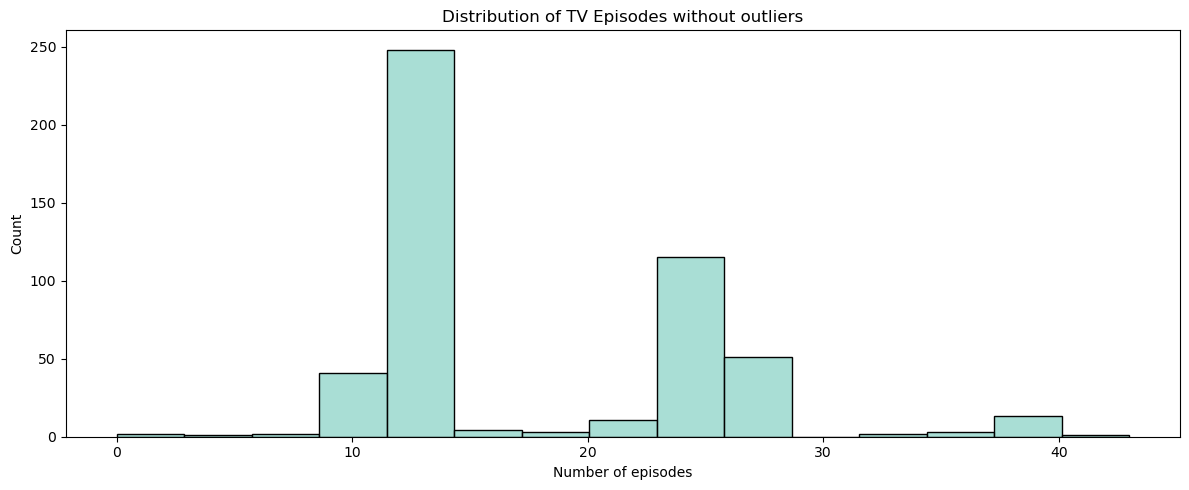

In [152]:
plt.figure(figsize=(12,5))
sns.histplot(anime_tv["episodes"], bins="auto")
plt.title("Distribution of TV Episodes")
plt.xlabel("Number of episodes")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

filtered_anime_runtime_tv = iqr_outliers(anime_tv, "episodes")

plt.figure(figsize=(12,5))
sns.histplot(filtered_anime_runtime_tv["episodes"], bins="auto")
plt.title("Distribution of TV Episodes without outliers")
plt.xlabel("Number of episodes")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Most of animes have a number of episodes between 10 and 15

<h style="color: #40cbee;"> With this insights, the "typical" anime will have around 12 episodes with a duration of 23-24 min.</h>

<h5> Check the total runtime of animes</h5>
Combining total episodes and the duration of each

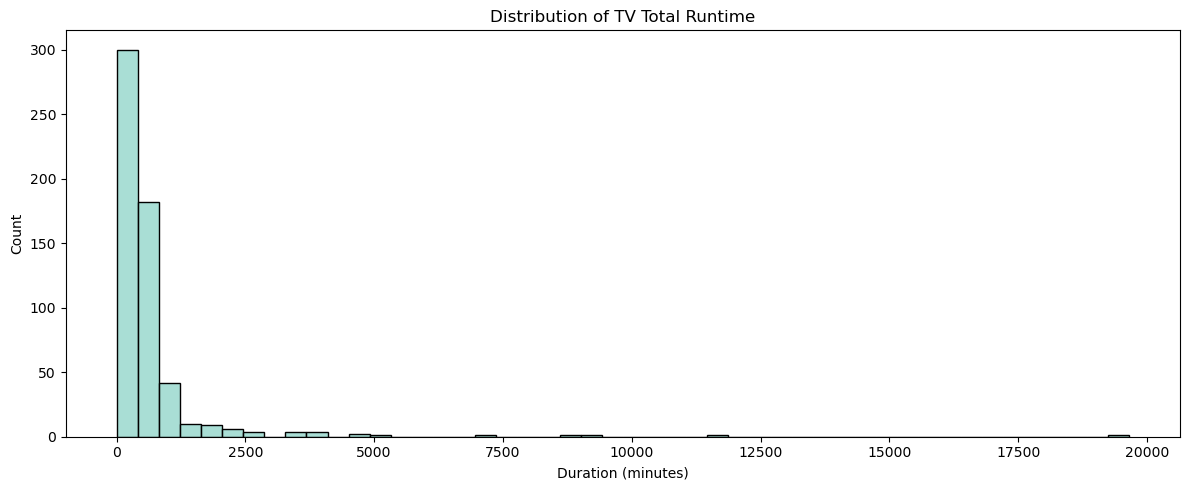

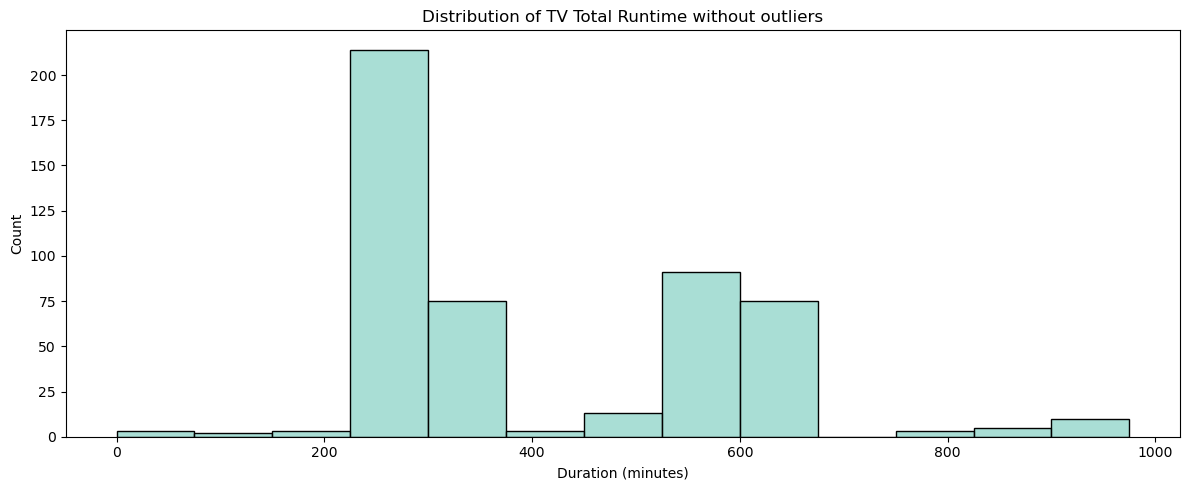

In [149]:
plt.figure(figsize=(12,5))
sns.histplot(anime_tv["total_runtime"], bins="auto")
plt.title("Distribution of TV Total Runtime")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

filtered_anime_runtime_tv = iqr_outliers(anime_tv, "total_runtime")

plt.figure(figsize=(12,5))
sns.histplot(filtered_anime_runtime_tv["total_runtime"], bins="auto")
plt.title("Distribution of TV Total Runtime without outliers")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Like before, by removing outliers, we can appreciate that there are two main peaks of anime total runtime

<h5> TV Animes runtime per period</h5>
To answer the question that we proposed at the beggining, we will have to determine at what decade does each anime belong, by checking their initial airdate

In [125]:
#determine periods of time
_80s_ = filtered_anime_runtime_tv["total_runtime"][filtered_anime_runtime_tv["start_date"].between(pd.Timestamp("1980-01-01"),pd.Timestamp("1989-12-31"))]
_90s_ = filtered_anime_runtime_tv["total_runtime"][filtered_anime_runtime_tv["start_date"].between(pd.Timestamp("1990-01-01"),pd.Timestamp("1999-12-31"))]
_00s_ = filtered_anime_runtime_tv["total_runtime"][filtered_anime_runtime_tv["start_date"].between(pd.Timestamp("2000-01-01"),pd.Timestamp("2009-12-31"))]
_2010s_ = filtered_anime_runtime_tv["total_runtime"][filtered_anime_runtime_tv["start_date"].between(pd.Timestamp("2010-01-01"),pd.Timestamp("2019-12-31"))]
_2020s_ = filtered_anime_runtime_tv["total_runtime"][filtered_anime_runtime_tv["start_date"].between(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-12-31"))]

In [164]:
# Function to define parts of the histograms
def tidy_hist(data, title, xlabel, bins=25, figsize=(10,4),xlim=None,ylim=None):
    plt.figure(figsize=figsize)
    sns.histplot(data, bins=bins)
    
    if xlim is not None:
        plt.xlim(xlim)

    if ylim is not None:
        plt.ylim(ylim)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

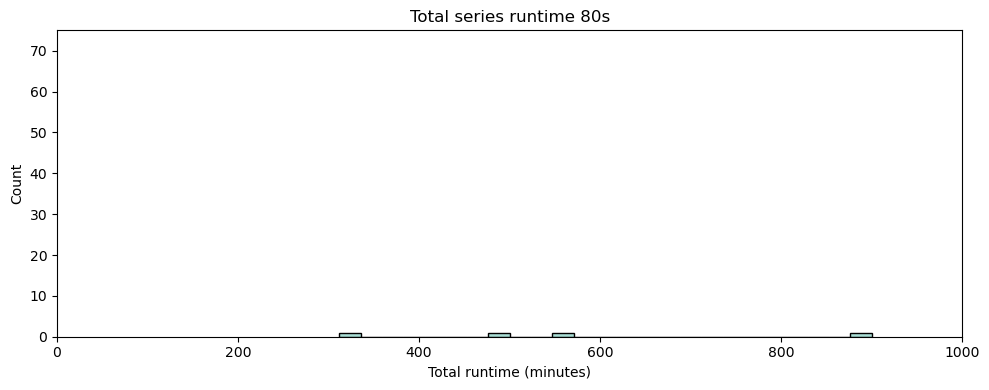

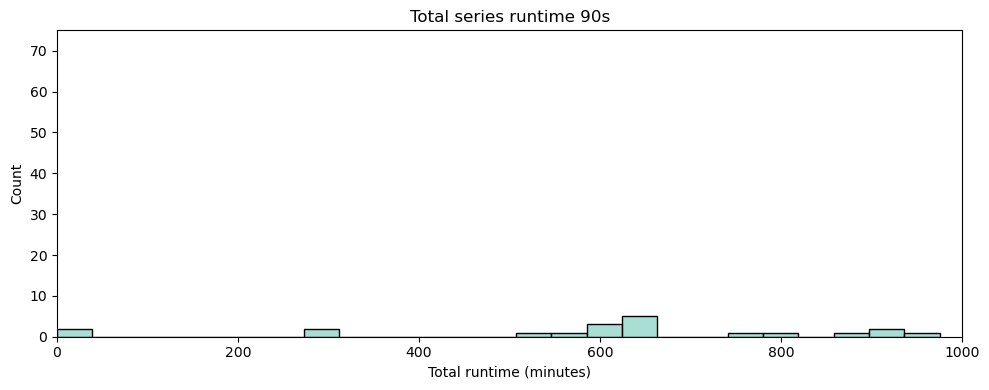

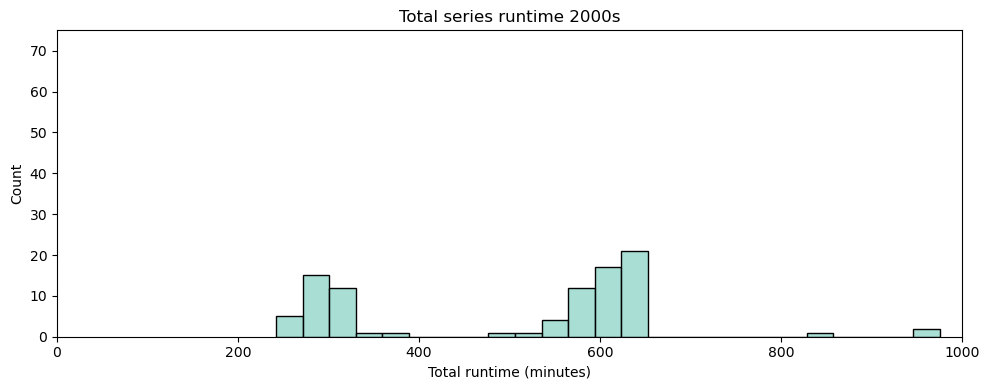

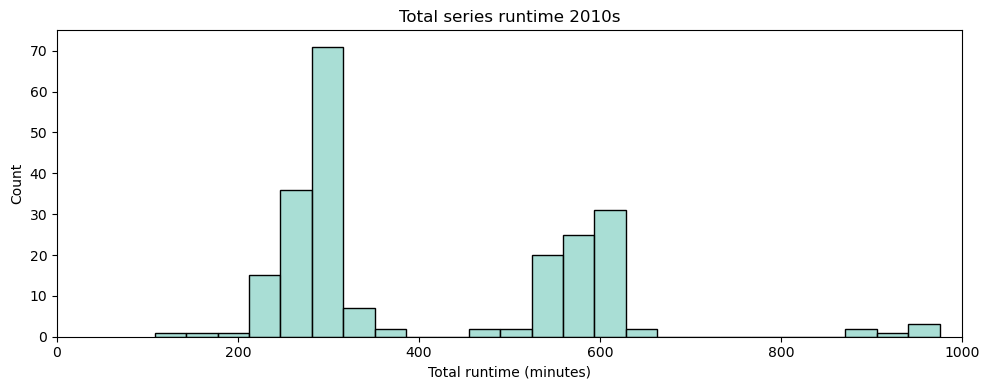

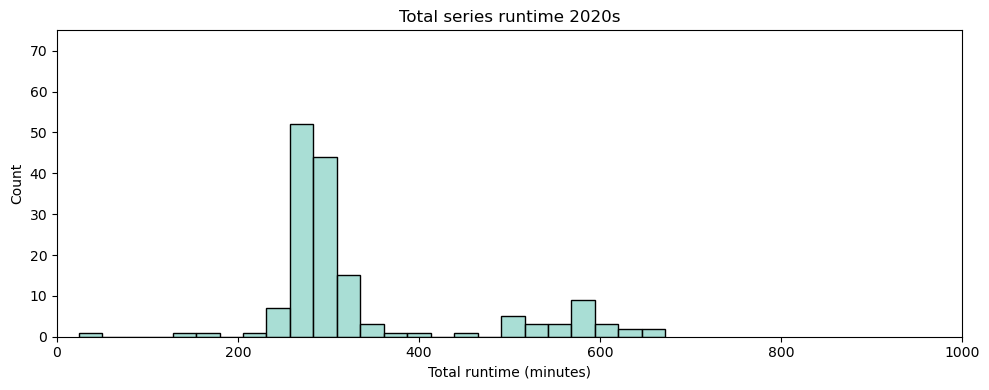

In [165]:
tidy_hist(_80s_, "Total series runtime 80s", "Total runtime (minutes)",xlim=(0,1000),ylim=(0,75))
tidy_hist(_90s_, "Total series runtime 90s", "Total runtime (minutes)",xlim=(0,1000),ylim=(0,75))
tidy_hist(_00s_, "Total series runtime 2000s", "Total runtime (minutes)",xlim=(0,1000),ylim=(0,75))
tidy_hist(_2010s_, "Total series runtime 2010s", "Total runtime (minutes)",xlim=(0,1000),ylim=(0,75))
tidy_hist(_2020s_, "Total series runtime 2020s", "Total runtime (minutes)",xlim=(0,1000),ylim=(0,75))

* With this we can see that the two main peaks of runtime have been present since the beggining
* Also we can see that 2010s was the best decade in terms of number of animes

Now we should compare the closest decades to see the changes

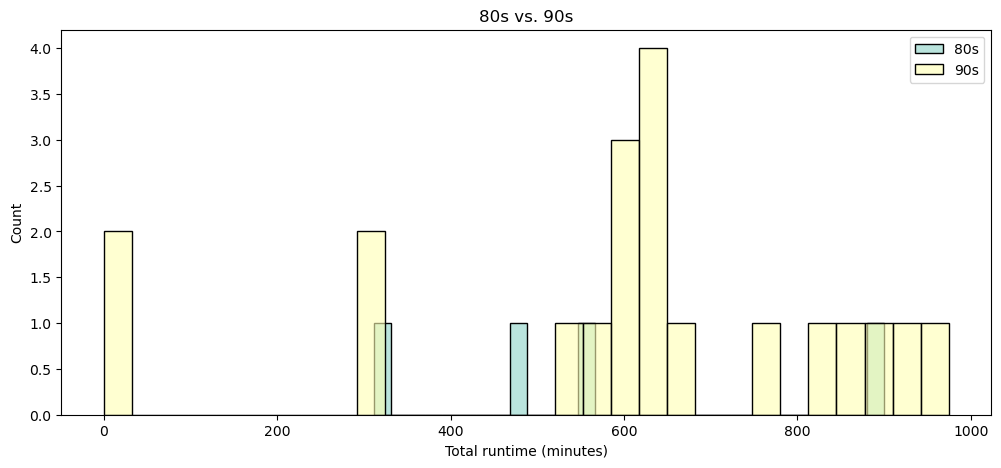

In [143]:
plt.figure(figsize=(12, 5))

sns.histplot(_80s_,bins=30,alpha=0.6,label="80s")
sns.histplot(_90s_,bins=30,alpha=0.6,label="90s")

plt.title("80s vs. 90s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

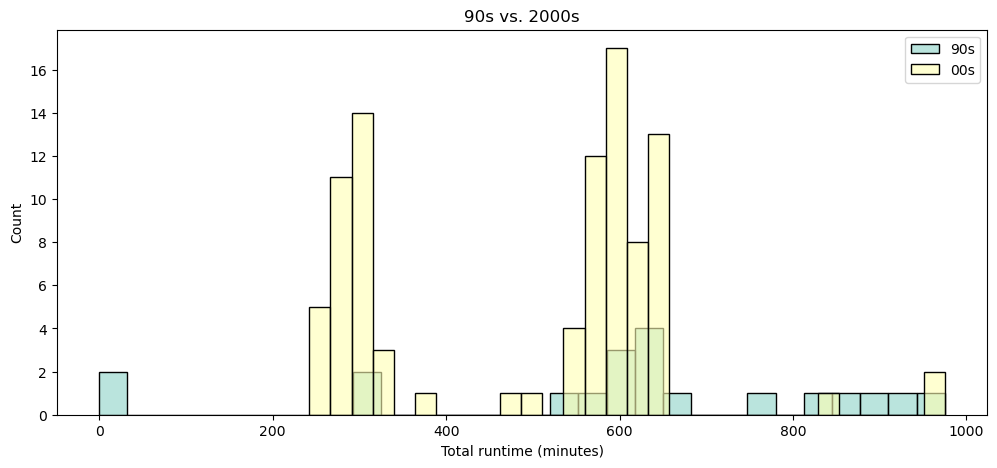

In [145]:
plt.figure(figsize=(12, 5))

sns.histplot(_90s_,bins=30,alpha=0.6,label="90s")
sns.histplot(_00s_,bins=30,alpha=0.6,label="00s")

plt.title("90s vs. 2000s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

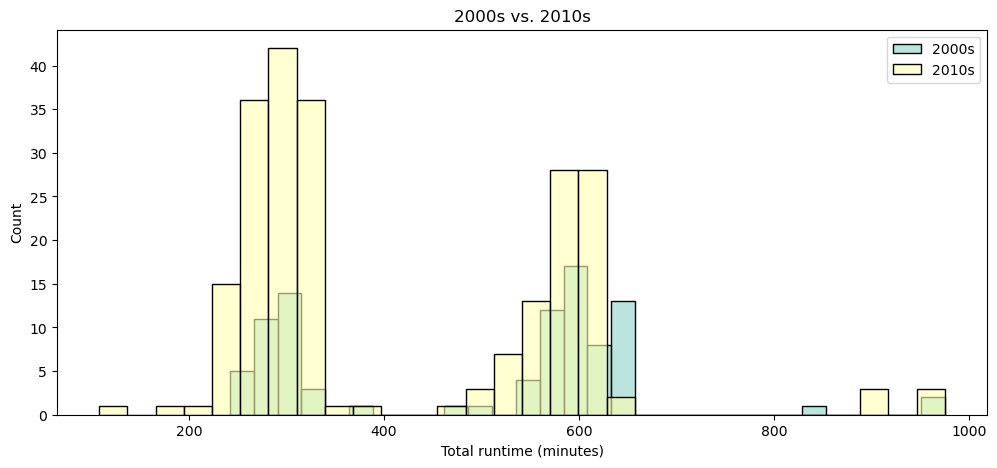

In [146]:
plt.figure(figsize=(12, 5))

sns.histplot(_00s_,bins=30,alpha=0.6,label="2000s")
sns.histplot(_2010s_,bins=30,alpha=0.6,label="2010s")

plt.title("2000s vs. 2010s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

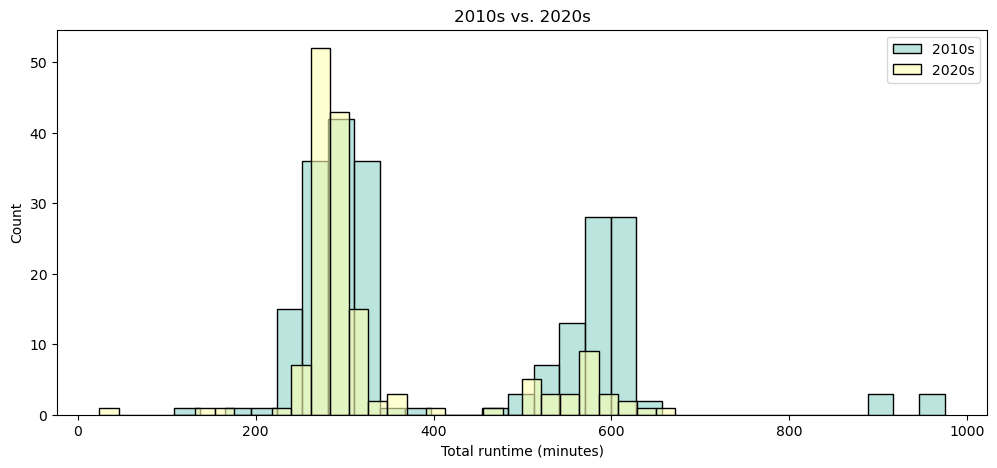

In [147]:
plt.figure(figsize=(12, 5))

sns.histplot(_2010s_,bins=30,alpha=0.6,label="2010s")
sns.histplot(_2020s_,bins=30,alpha=0.6,label="2020s")

plt.title("2010s vs. 2020s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

<u>Considerations:</u>

* This is a series of runtime distibutions based on anime popularity by 2024 standards.
* The sample volume for the 1980s and 1990s is very low.
    * Although that means that animes from those decades are not very popular nowadays

<u> Conclusions </u>
* There is weak evidence that suggest that popular modern anime tends to be shorter in total run time compared to older popular anime (everything by 2024 standards).
* The tendency of episode count is to have shorter episode count as time moves forward.

<h4>-- Movies --</h4>

In [158]:
# We consider Movies and animes with only one episode. So, total runtime = episode duration
anime_movie = anime[(anime["type"] == "Movie") & (anime["episodes"] == 1)]
#And remove outliers to futher analysis
filtered_anime_duration_movie = iqr_outliers(anime_movie, "duration_min")

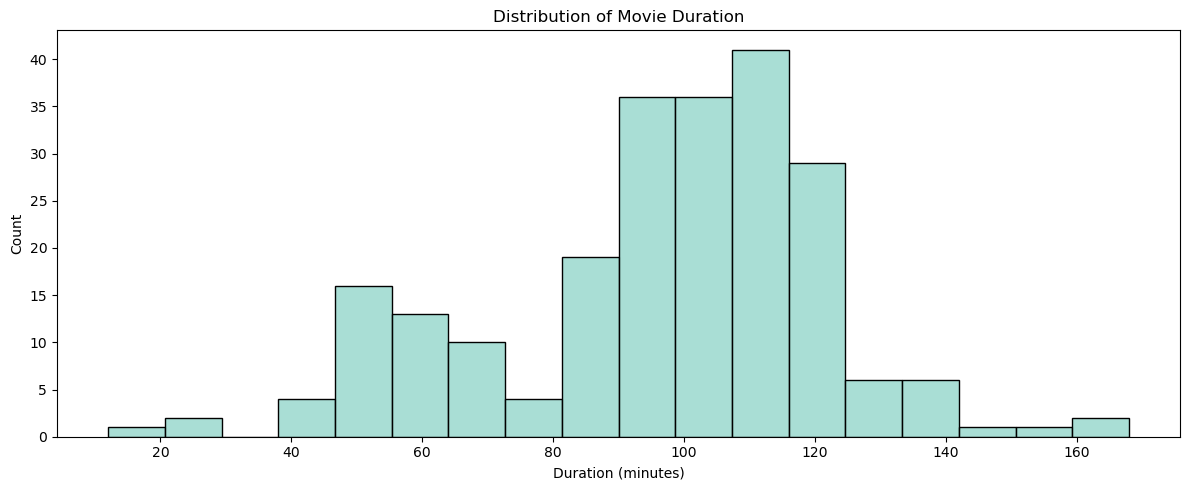

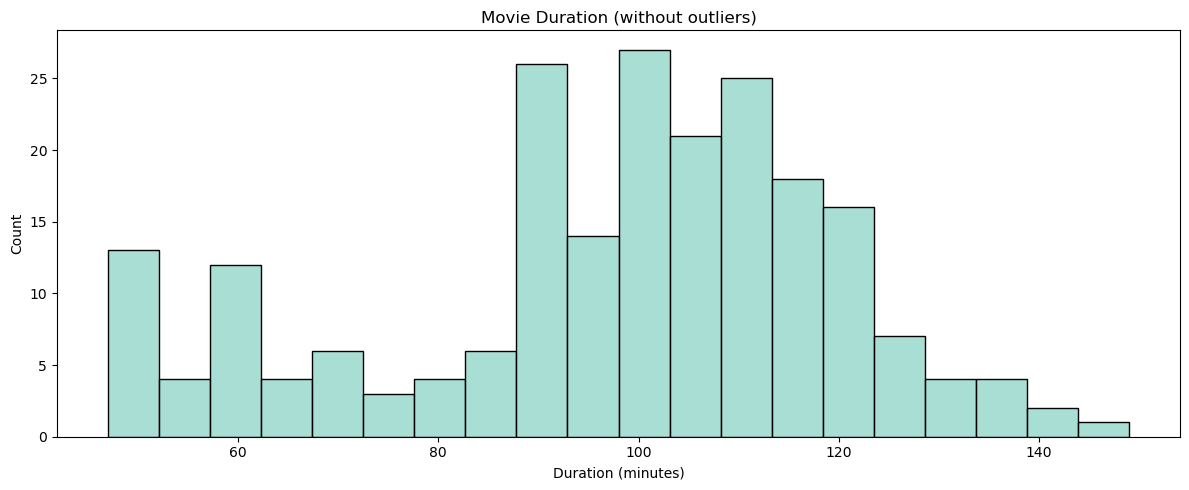

In [157]:
plt.figure(figsize=(12,5))
sns.histplot(anime_movie["duration_min"], bins="auto")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=filtered_anime_duration_movie,x="duration_min",bins=20,)
plt.title("Movie Duration (without outliers)")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()

By removing the outliers we leave out those animes with only one chapter that are short (as TV Specials)
* Most of Movies duration is in the 100-120 min range

<h5> Movies runtime per period</h5>
As with episodes, we determine at what decade does each anime belong by checking their initial airdate

In [159]:
#determine periods of time
_m80s_ = filtered_anime_duration_movie["total_runtime"][filtered_anime_duration_movie["start_date"].between(pd.Timestamp("1980-01-01"),pd.Timestamp("1989-12-31"))]
_m90s_ = filtered_anime_duration_movie["total_runtime"][filtered_anime_duration_movie["start_date"].between(pd.Timestamp("1990-01-01"),pd.Timestamp("1999-12-31"))]
_m00s_ = filtered_anime_duration_movie["total_runtime"][filtered_anime_duration_movie["start_date"].between(pd.Timestamp("2000-01-01"),pd.Timestamp("2009-12-31"))]
_m2010s_ = filtered_anime_duration_movie["total_runtime"][filtered_anime_duration_movie["start_date"].between(pd.Timestamp("2010-01-01"),pd.Timestamp("2019-12-31"))]
_m2020s_ = filtered_anime_duration_movie["total_runtime"][filtered_anime_duration_movie["start_date"].between(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-12-31"))]

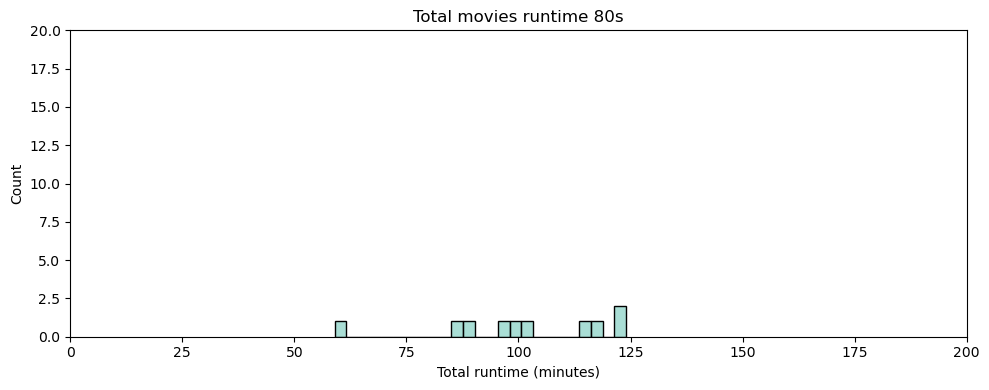

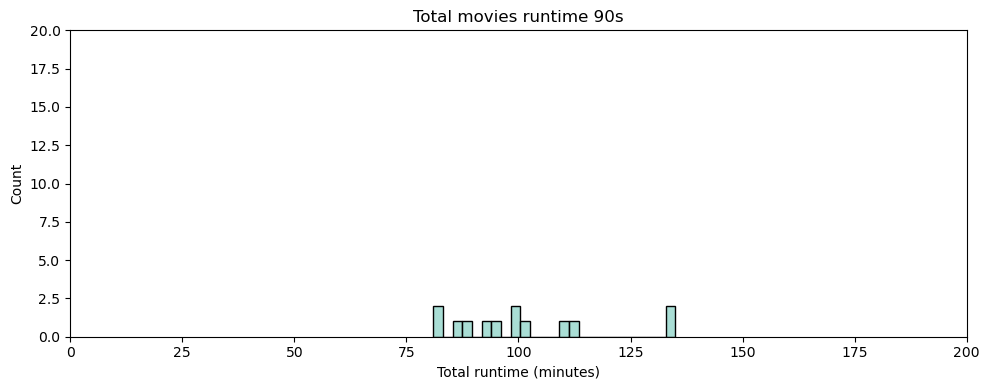

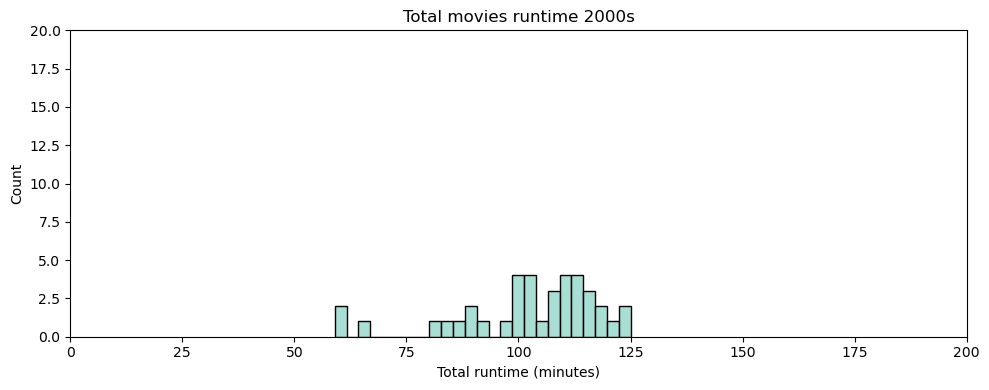

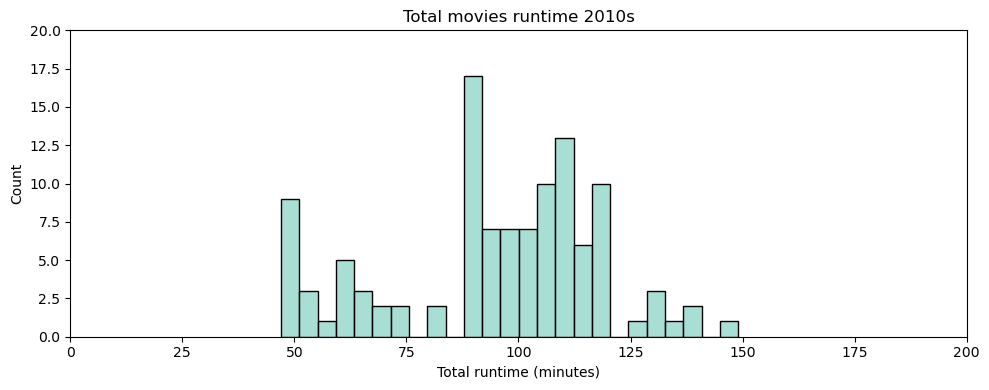

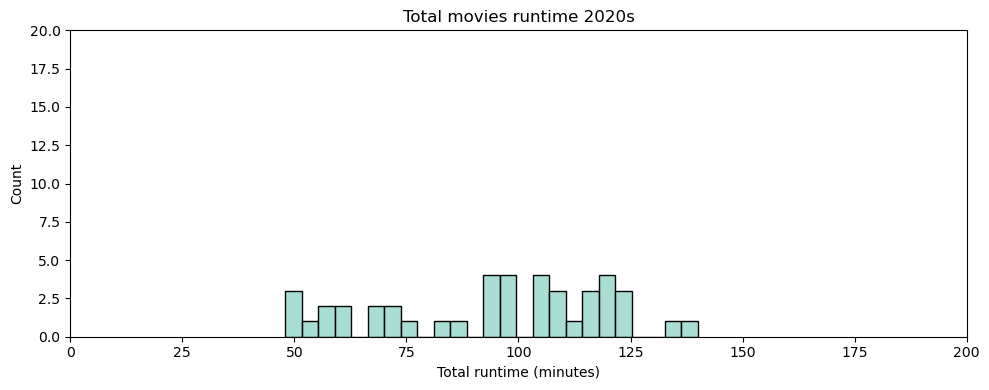

In [166]:
tidy_hist(_m80s_, "Total movies runtime 80s", "Total runtime (minutes)",xlim=(0,200),ylim=(0,20))
tidy_hist(_m90s_, "Total movies runtime 90s", "Total runtime (minutes)",xlim=(0,200),ylim=(0,20))
tidy_hist(_m00s_, "Total movies runtime 2000s", "Total runtime (minutes)",xlim=(0,200),ylim=(0,20))
tidy_hist(_m2010s_, "Total movies runtime 2010s", "Total runtime (minutes)",xlim=(0,200),ylim=(0,20))
tidy_hist(_m2020s_, "Total movies runtime 2020s", "Total runtime (minutes)",xlim=(0,200),ylim=(0,20))

* We can appreciate that there are more movies from 2010s (Which based on the data means that they hare better ranked)
* And that the duration of movies has slowly been increased

Now we should compare the closest decades to see the changes

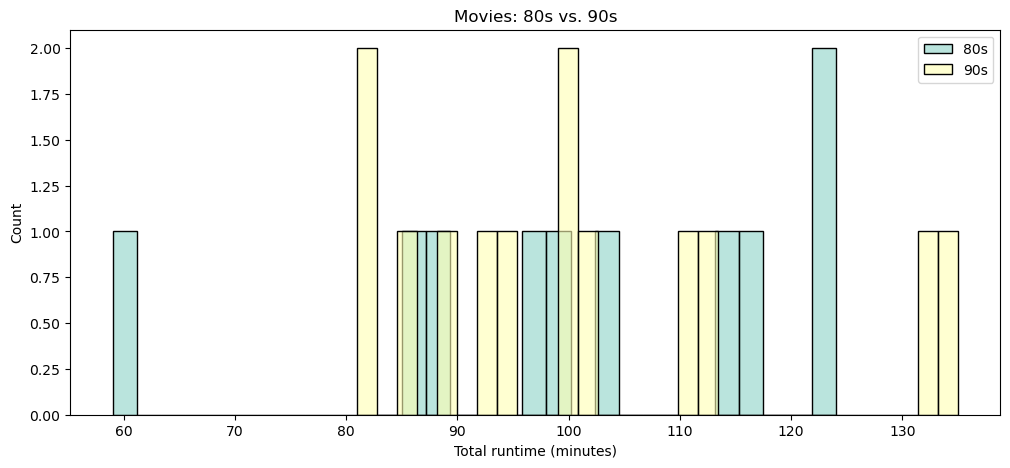

In [167]:
plt.figure(figsize=(12, 5))

sns.histplot(_m80s_,bins=30,alpha=0.6,label="80s")
sns.histplot(_m90s_,bins=30,alpha=0.6,label="90s")

plt.title("Movies: 80s vs. 90s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

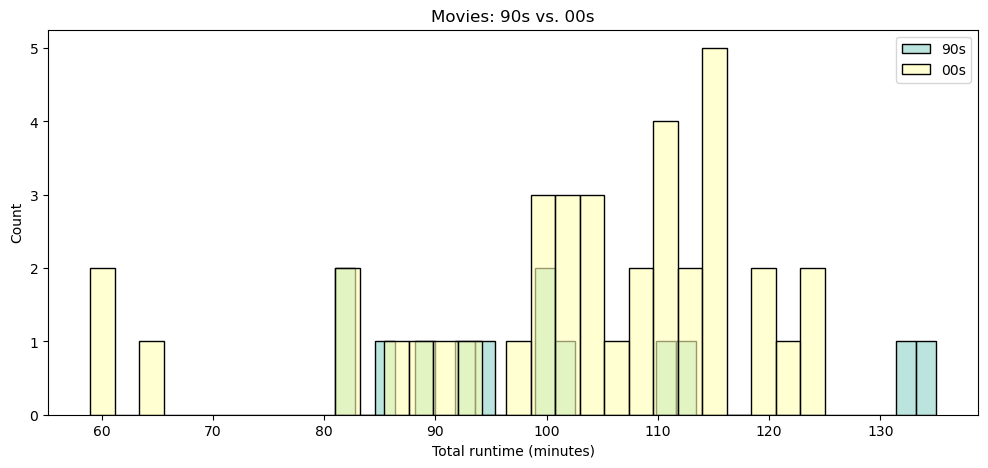

In [169]:
plt.figure(figsize=(12, 5))

sns.histplot(_m90s_,bins=30,alpha=0.6,label="90s")
sns.histplot(_m00s_,bins=30,alpha=0.6,label="00s")

plt.title("Movies: 90s vs. 00s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

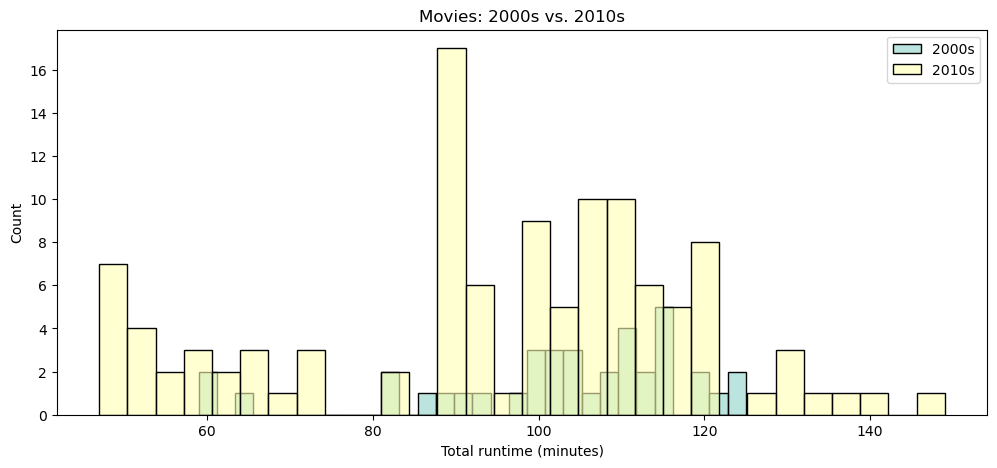

In [170]:
plt.figure(figsize=(12, 5))

sns.histplot(_m00s_,bins=30,alpha=0.6,label="2000s")
sns.histplot(_m2010s_,bins=30,alpha=0.6,label="2010s")

plt.title("Movies: 2000s vs. 2010s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

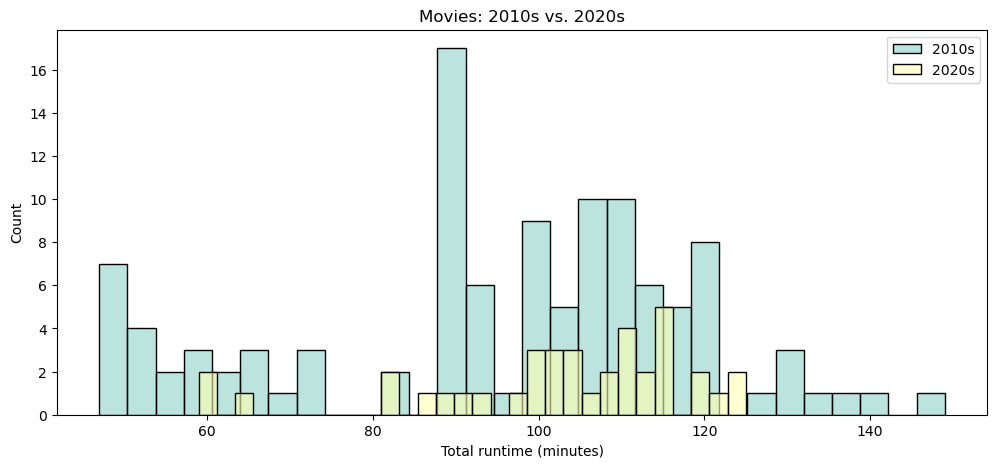

In [171]:
plt.figure(figsize=(12, 5))

sns.histplot(_m2010s_,bins=30,alpha=0.6,label="2010s")
sns.histplot(_m00s_,bins=30,alpha=0.6,label="2020s")

plt.title("Movies: 2010s vs. 2020s")
plt.xlabel("Total runtime (minutes)")
plt.ylabel("Count")
plt.legend()

<u> Conclusions </u>
* We have the confirmation that 2010s produced the most popular movies

<h2> 2. What's the correlation between popularity (based on score), genre and studios? </h2>
Is it there a clear "popularuty formula"?

In [174]:
#We will use score, studios and all the genres columns
genre_cols=['action', 'adventure',
       'avant_garde', 'award_winning', 'boys_love', 'comedy', 'drama', 'ecchi',
       'fantasy', 'girls_love', 'gourmet', 'horror', 'mystery', 'romance',
       'sci-fi', 'slice_of_life', 'sports', 'supernatural', 'suspense']

We can create a visual correlation between genre and score

In [179]:
genre_scores = {}

for genre in genre_cols:
    genre_scores[genre] = df.loc[df[genre] == 1, "score"].mean()

genre_score_df = (
    pd.DataFrame.from_dict(genre_scores, orient="index", columns=["mean_score"])
    .sort_values("mean_score", ascending=False)
)

genre_score_df = genre_score_df.reset_index()
genre_score_df.columns = ["genre", "mean_score"]

In [186]:
genre_score_df

,genre,mean_score
0,suspense,8.281923
1,sports,8.266250
2,award_winning,8.257875
3,supernatural,8.237891
4,slice_of_life,8.234359
5,drama,8.204931
6,avant_garde,8.180000
7,sci-fi,8.179944
8,action,8.177678
9,mystery,8.176913


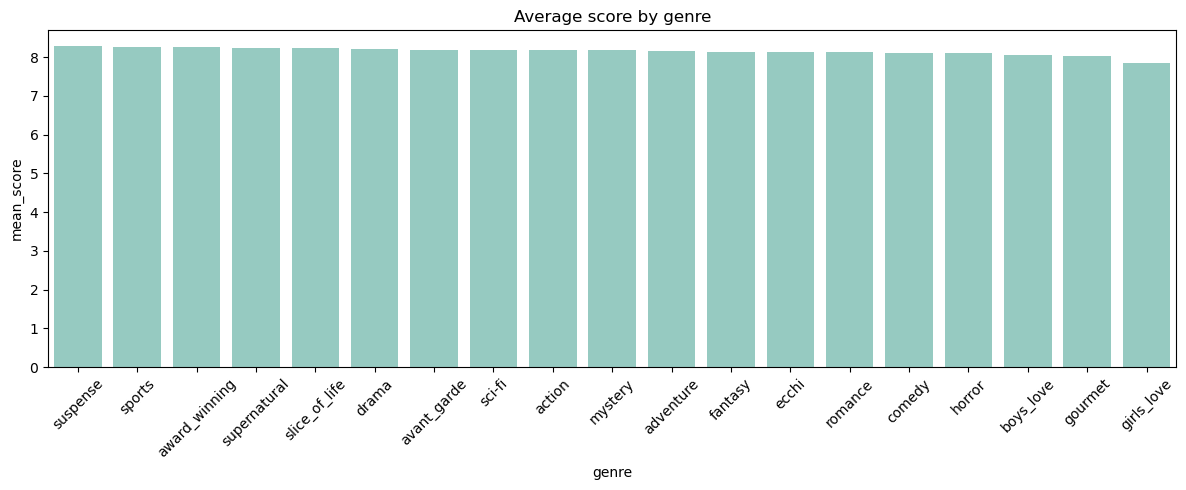

In [185]:
plt.figure(figsize=(12,5))

sns.barplot(
    data=genre_score_df,
    x="genre",
    y="mean_score",
    order=genre_score_df.sort_values("mean_score", ascending=False)["genre"]
)

plt.title("Average score by genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can appreciate that 'suspense' is the most popular genre, but all are in a very close range
*    Expected as the data is for the 1000 most popular animes

Now, let's show it together with the studios

In [198]:
# We convert all genres into a single column
df_genres = df.melt(
    id_vars=["score", "studios"],
    value_vars=genre_cols,
    var_name="genre",
    value_name="has_genre"
)

df_genres = df_genres[df_genres["has_genre"] == 1]  #to avoid repetition of animes in genres that it doesn't have


In [199]:
df_genres 

,score,studios,genre,has_genre
1,9.09,[Bones],action,1
3,9.06,[Bandai Namco Pictures],action,1
4,9.05,[Wit Studio],action,1
5,9.04,[Bandai Namco Pictures],action,1
6,9.04,[Madhouse],action,1
...,...,...,...,...
18929,7.83,[BUG FILMS],suspense,1
18930,7.83,[Shuka],suspense,1
18939,7.83,[NAZ],suspense,1
18941,7.82,[Orange],suspense,1


In [ ]:
#transform studios list into various rows
df_genres = df_genres.explode("studios")
df_genres

,score,studios,genre,has_genre
1,9.09,Bones,action,1
3,9.06,Bandai Namco Pictures,action,1
4,9.05,Wit Studio,action,1
5,9.04,Bandai Namco Pictures,action,1
6,9.04,Madhouse,action,1
...,...,...,...,...
18929,7.83,BUG FILMS,suspense,1
18930,7.83,Shuka,suspense,1
18939,7.83,NAZ,suspense,1
18941,7.82,Orange,suspense,1


In [201]:
#calculate the average score per genre & studio
genre_studio_score = (
    df_genres
    .groupby(["genre", "studios"])["score"]
    .mean()
    .reset_index()
)

In [194]:
genre_studio_score

,genre,studios,score
0,action,8bit,8.146667
1,action,A-1 Pictures,8.166667
2,action,A.C.G.T.,8.170000
3,action,AHA Entertainment,7.950000
4,action,AIC,8.330000
...,...,...,...
704,suspense,Toei Animation,8.420000
705,suspense,Triangle Staff,8.090000
706,suspense,White Fox,8.475000
707,suspense,Wit Studio,8.348750


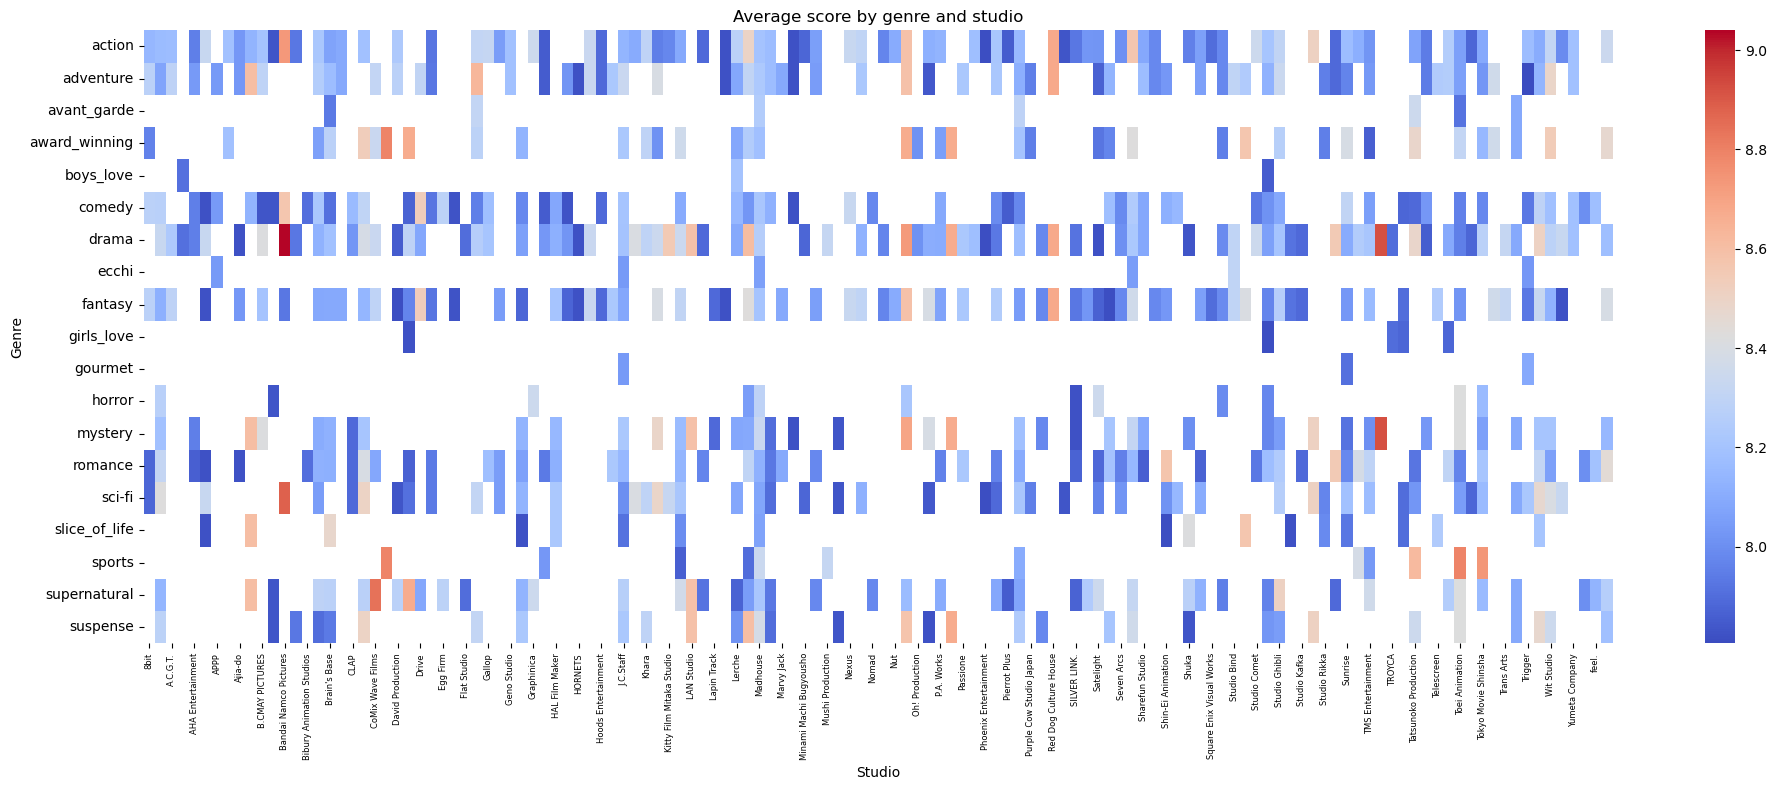

In [213]:
plt.figure(figsize=(20,8))

sns.heatmap(genre_studio_score.pivot(index="genre",columns="studios",values="score"),
    cmap="coolwarm"
)

plt.title("Average score by genre and studio")
plt.xlabel("Studio")
plt.xticks(fontsize=6)
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

This huge heatmap give us various insights
* Some genres, like 'avant gard', 'gourmet', 'girls love' and 'boys love' are made by a few studios
* Mos of the studios only do 2-3 types of genre, so the do tend to specialise

Now we could show a more meaninful heatmap by showing only the top10 average scored animes by genre and studio 

In [214]:
genre_studio_score_top10 = genre_studio_score.sort_values("score", ascending=False).head(10)
genre_studio_score_top10

,genre,studios,score
269,drama,Bandai Namco Pictures,9.040000
332,drama,TOHO animation STUDIO,8.920000
484,mystery,TOHO animation STUDIO,8.920000
551,sci-fi,Bandai Namco Pictures,8.881667
635,supernatural,CoMix Wave Films,8.840000
627,sports,Toei Animation,8.790000
165,award_winning,DandeLion Animation Studio,8.790000
617,sports,DandeLion Animation Studio,8.790000
628,sports,Tokyo Movie Shinsha,8.740000
10,action,Bandai Namco Pictures,8.732500


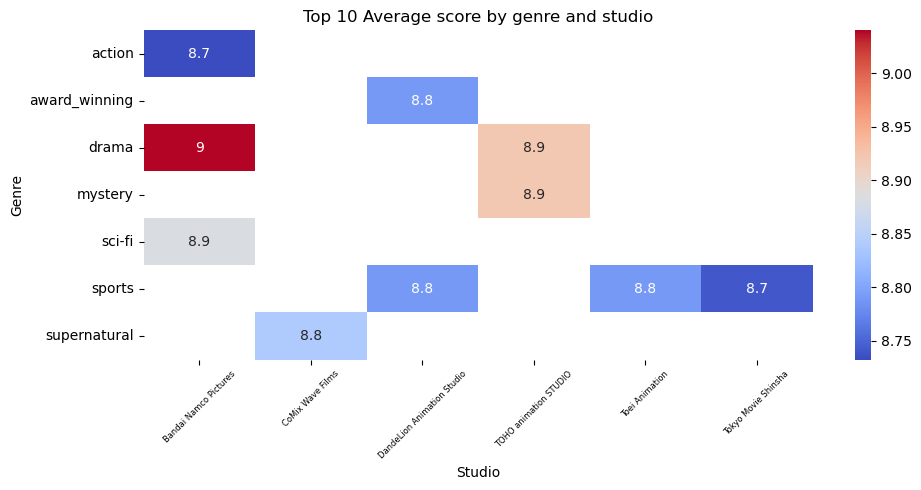

In [220]:
plt.figure(figsize=(10,5))

sns.heatmap(genre_studio_score_top10.pivot(index="genre",columns="studios",values="score"),
    cmap="coolwarm",
    annot=True
)

plt.title("Top 10 Average score by genre and studio")
plt.xlabel("Studio")
plt.xticks(fontsize=6, rotation=45)
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

<h style="color: #40cbee;"> With the data provided, we can determine that the most succesful (by average score) animes are: **Drama animes made by Bandai Namco Pictures.**</h>

To provide further analysis, we can present the top5 most represented studios (by animes appearing in the data) by genre and score

In [241]:
 # Process
# explode studios (is a list)
# calculate top5 studios by number of animes and filter the df
# melt the genres
# group by avg score
# visualization

In [228]:
anime_studios = anime.explode("studios")
top5_studios = (anime_studios["studios"].value_counts().head(5).index)
anime_studios_top = anime_studios[anime_studios["studios"].isin(top5_studios)]
anime_studios_top_genres = anime_studios_top.melt(id_vars=["score", "studios"],value_vars=genre_cols,var_name="genre",value_name="has_genre")
anime_studios_top_genres = anime_studios_top_genres[anime_studios_top_genres["has_genre"] == 1]
studios_genre_score = (anime_studios_top_genres.groupby(["studios", "genre"])["score"].mean().reset_index())

In [229]:
studios_genre_score

,studios,genre,score
0,Bones,action,8.217391
1,Bones,adventure,8.250000
2,Bones,award_winning,8.060000
3,Bones,comedy,8.217778
4,Bones,drama,8.127273
...,...,...,...
57,TMS Entertainment,mystery,8.003333
58,TMS Entertainment,romance,8.294545
59,TMS Entertainment,sci-fi,8.167143
60,TMS Entertainment,sports,8.035000


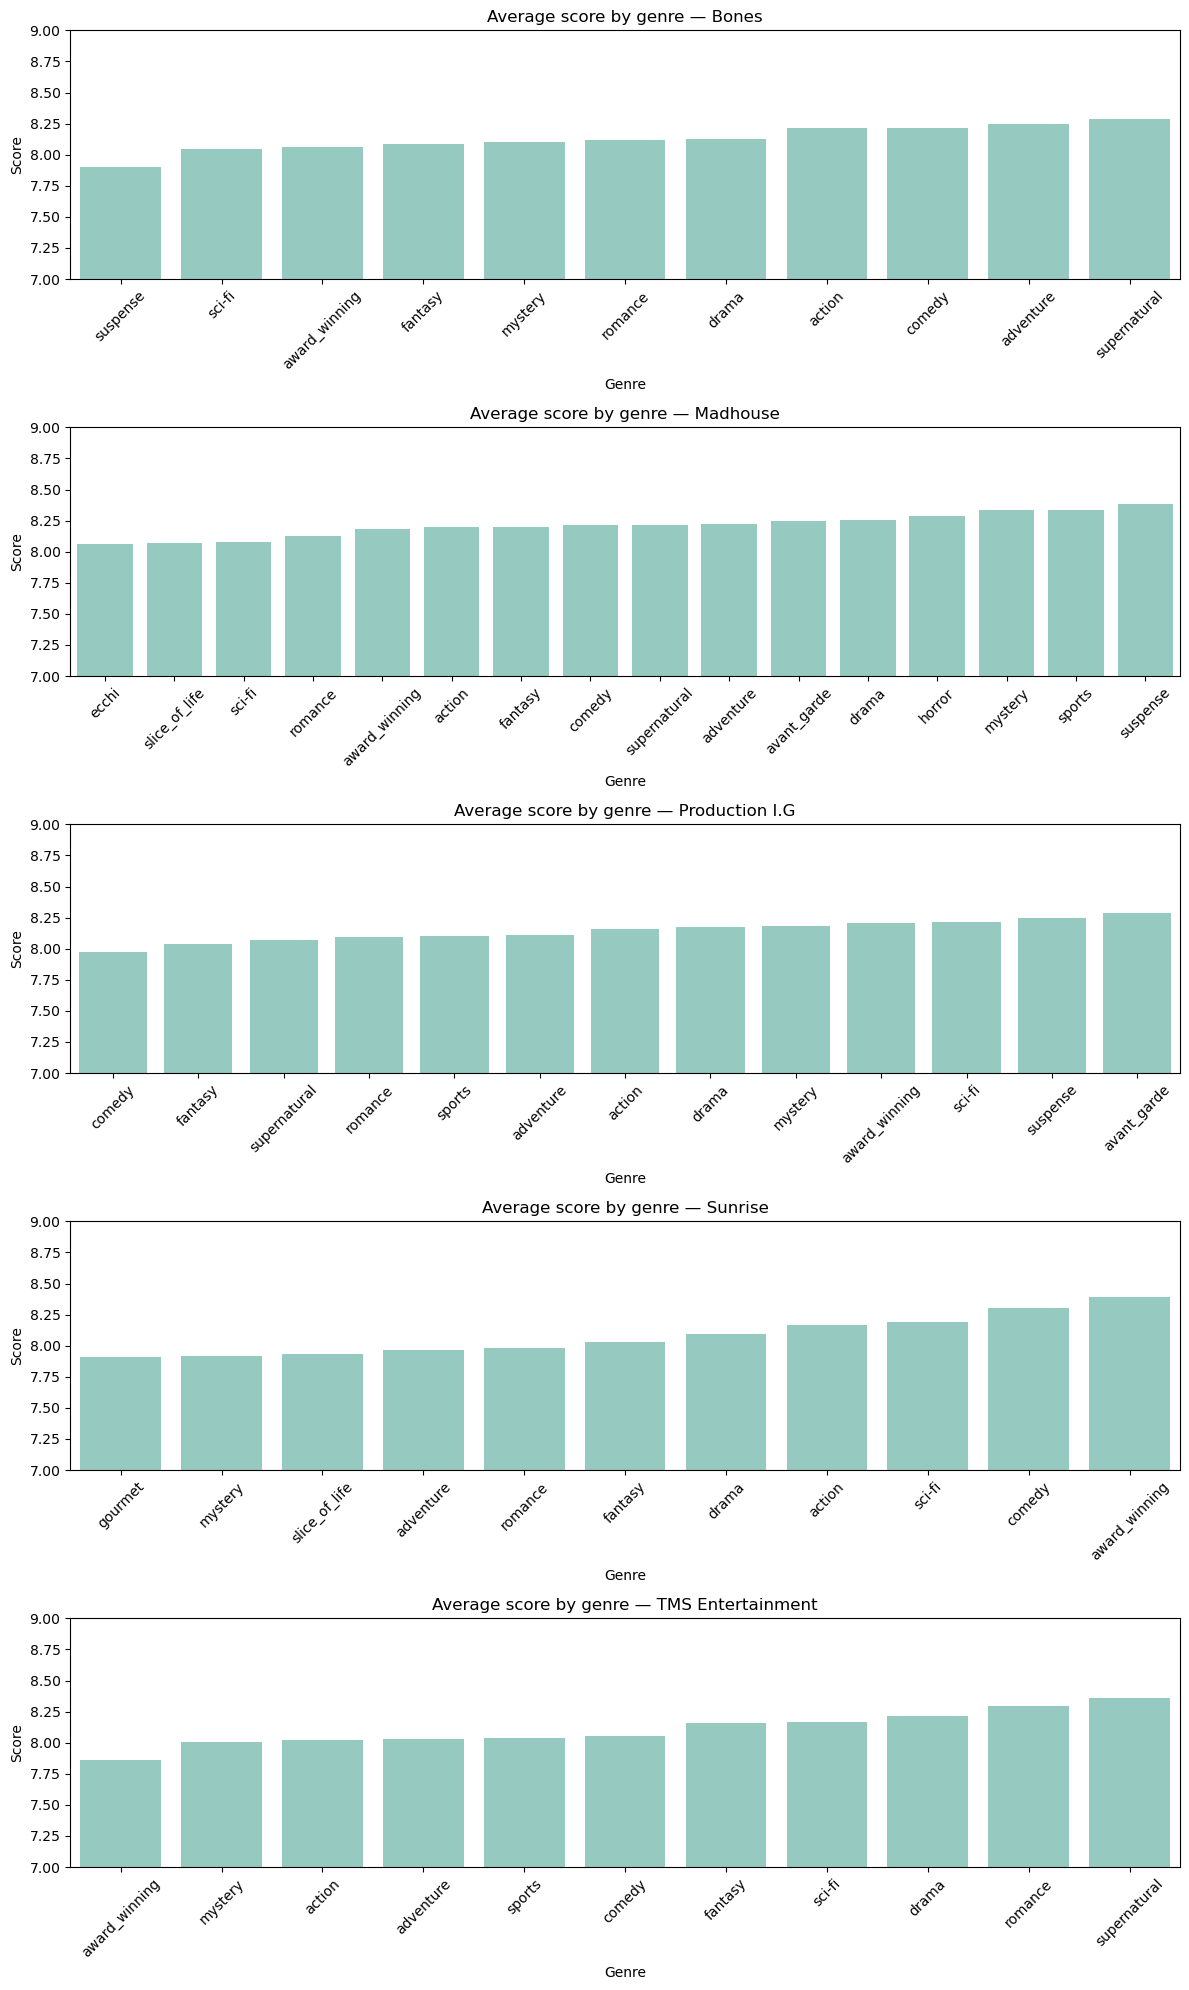

In [246]:
studios = studios_genre_score["studios"].unique()

fig, axes = plt.subplots(
    nrows=len(studios),
    ncols=1,
    figsize=(12, 4 * len(studios)),
    sharex=False
)

for ax, studio in zip(axes, studios):
    data = studios_genre_score[studios_genre_score["studios"] == studio]

    order = data.sort_values("score", ascending=True)["genre"]

    sns.barplot(
        data=data,
        x="genre",
        y="score",
        ax=ax,
        order=order
    )

    ax.set_title(f"Average score by genre — {studio}")
    ax.set_ylabel("Score")
    ax.set_ylim(7, 9)
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("Genre")


plt.tight_layout()
plt.show()


We've narrowed the barplots to show score only from 7 to 9, which is the most relevant score in the data

Finally we can work with the most represented genre, showing which studios use that genre, and the average score of each studio on that genre

In [247]:
 # Process
# identify most represented genre (by count)
# filter dataset
# explode studios (is a list)
# group by avg score
# visualization (barplot)

In [248]:
top_genre = anime[genre_cols].sum().idxmax()
top_genre

'action'

In [249]:
anime_top_genre = anime[anime[top_genre] == 1]
anime_top_genre = anime_top_genre.explode("studios")
studio_score_top_genre = (anime_top_genre.groupby("studios")["score"].mean().reset_index().sort_values("score", ascending=False))

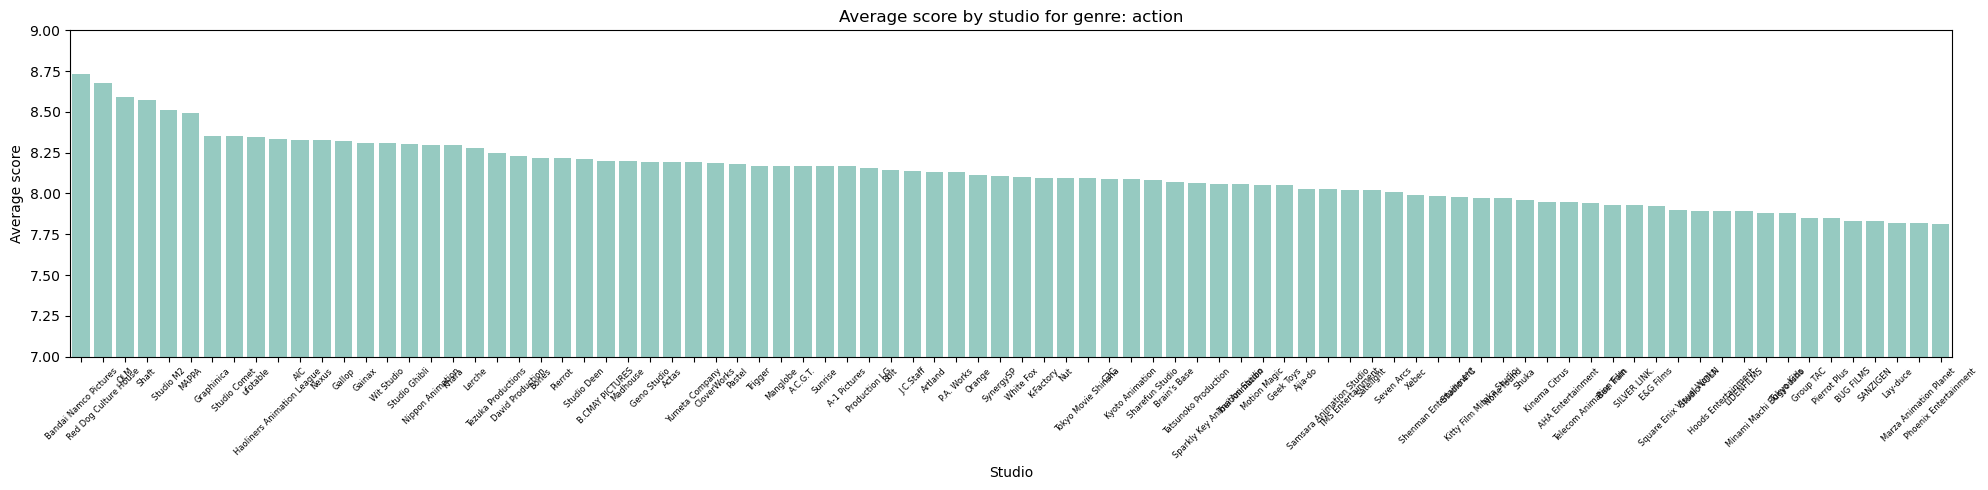

In [253]:
plt.figure(figsize=(20,5))

sns.barplot(
    data=studio_score_top_genre,
    x="studios",
    y="score",
)

plt.title(f"Average score by studio for genre: {top_genre}")
plt.xlabel("Studio")
plt.ylabel("Average score")
plt.ylim(7, 9)
plt.xticks(fontsize=6, rotation=45)
plt.tight_layout()
plt.show()

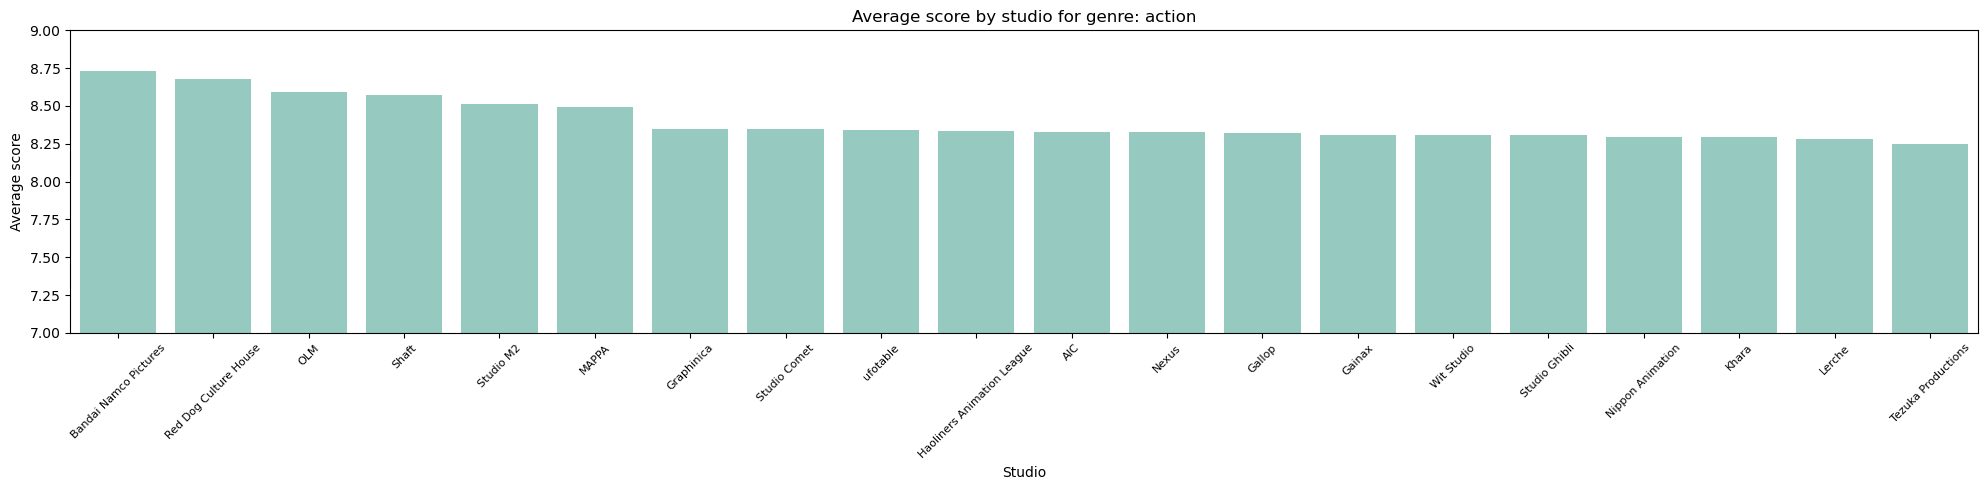

In [255]:
plt.figure(figsize=(20,5))

sns.barplot(
    data=studio_score_top_genre.head(20),
    x="studios",
    y="score",
)

plt.title(f"Average score by studio for genre: {top_genre}")
plt.xlabel("Studio")
plt.ylabel("Average score")
plt.ylim(7, 9)
plt.xticks(fontsize=8, rotation=45)
plt.tight_layout()
plt.show()

We can appreciate here that for the most represented genre ("Action"), the studio with the highest score is "Bandai Namco Pictures"